Challenge Set 2: Pandas (movies data)

Topic: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: 10 minutes to pandas

Data: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: 2013_movies.csv

Exercise 2.1

Plot domestic total gross over time.

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import plt
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# STUDENT SECTION
# Set the root location where the data is stored
path_to_data = '2013_movies.csv'
# Read in the bike data
df = pd.read_csv(path_to_data)
# Use head to view the first few rows
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


In [3]:
df.columns

Index([u'Title', u'Budget', u'DomesticTotalGross', u'Director', u'Rating',
       u'Runtime', u'ReleaseDate'],
      dtype='object')

In [4]:
df.ReleaseDate.dtype

dtype('O')

In [5]:
df['ReleaseDateFormatted']=pd.to_datetime(df.ReleaseDate)

In [6]:
df.dtypes

Title                           object
Budget                         float64
DomesticTotalGross               int64
Director                        object
Rating                          object
Runtime                          int64
ReleaseDate                     object
ReleaseDateFormatted    datetime64[ns]
dtype: object

In [7]:
df.sort_values(["ReleaseDateFormatted"]).head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseDateFormatted
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,1/4/13 0:00,2013-01-04
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,1/11/13 0:00,2013-01-11
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,1/11/13 0:00,2013-01-11
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,1/18/13 0:00,2013-01-18
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,1/25/13 0:00,2013-01-25


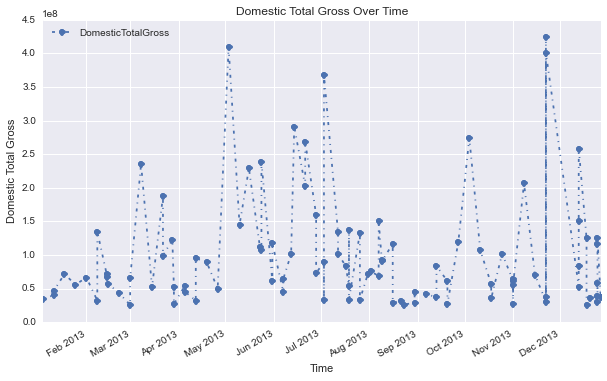

In [8]:
df.plot("ReleaseDateFormatted", "DomesticTotalGross", marker="o", linestyle="-.", figsize=(10, 6))
plt.title("Domestic Total Gross Over Time")
plt.xlabel("Time")
plt.ylabel('Domestic Total Gross')

Exercise 2.2

Plot runtime vs. domestic total gross.

In [9]:
df1=df.sort_values(["DomesticTotalGross"]).reset_index()

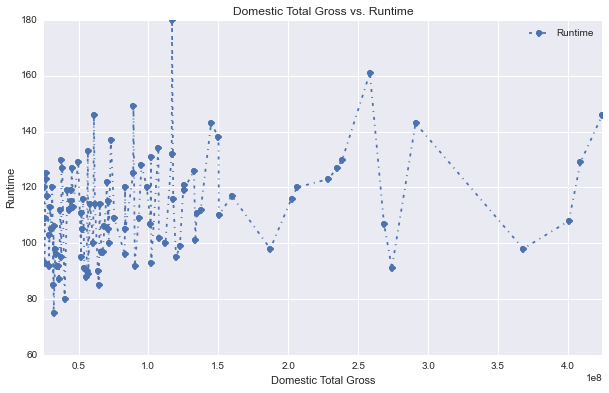

In [10]:
df1.plot("DomesticTotalGross","Runtime",  marker="o", linestyle="-.", figsize=(10, 6))
plt.title("Domestic Total Gross vs. Runtime")
plt.xlabel("Domestic Total Gross")
plt.ylabel('Runtime')

Exercise 2.3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [11]:
df3=(df
    .groupby(["Rating"])
    .mean()
    .reset_index()
    )
df3.drop("Budget", axis=1)

,Rating,DomesticTotalGross,Runtime
0,G,2.684928e+08,107.000000
1,PG,1.311357e+08,99.933333
2,PG-13,1.114498e+08,117.510638
3,R,6.989243e+07,110.729730


Exercise 2.4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross

In [12]:
G = df[(df.Rating=="G")]
PG = df[(df.Rating=="PG")]
PG13 = df[(df.Rating=="PG-13")]
R = df[(df.Rating=="R")]

In [13]:
G=G.sort_values(["ReleaseDateFormatted"]).reset_index()
PG=PG.sort_values(["ReleaseDateFormatted"]).reset_index()
PG13=PG13.sort_values(["ReleaseDateFormatted"]).reset_index()
R=R.sort_values(["ReleaseDateFormatted"]).reset_index()

(0, 450000000)

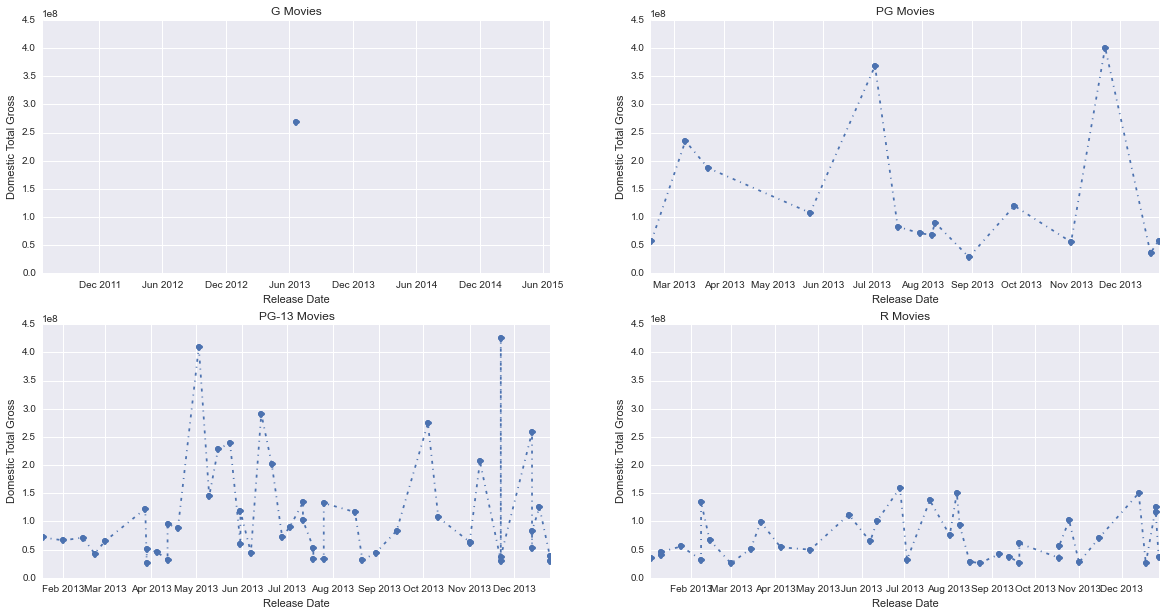

In [14]:
fig = plt.subplots(2, 2, figsize=(20, 10))
plt.subplot(2,2,1)
plt.plot(G['ReleaseDateFormatted'],G['DomesticTotalGross'],  marker="o", linestyle="-.")
plt.title('G Movies')
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross')
plt.ylim([0,450000000])

plt.subplot(2,2,2)
plt.plot(PG['ReleaseDateFormatted'],PG['DomesticTotalGross'],  marker="o", linestyle="-.")
plt.title('PG Movies')
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross')
plt.ylim([0,450000000])

plt.subplot(2,2,3)
plt.plot(PG13['ReleaseDateFormatted'],PG13['DomesticTotalGross'],  marker="o", linestyle="-.")
plt.title('PG-13 Movies')
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross')
plt.ylim([0,450000000])

plt.subplot(2,2,4)
plt.plot(R['ReleaseDateFormatted'],R['DomesticTotalGross'],  marker="o", linestyle="-.")
plt.title('R Movies')
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross')
plt.ylim([0,450000000])

Exercise 2.5

What director in your dataset has the highest gross per movie? 
Answer: Francis Lawrence

In [15]:
dfdir=(df
    .groupby(["Director"])
    .mean()
    .reset_index()
    .sort_values(["DomesticTotalGross"],ascending=False)
    )
dfdir.head()

,Director,Budget,DomesticTotalGross,Runtime
27,Francis Lawrence,130000000.0,424668047.0,146.0
81,Shane Black,200000000.0,409013994.0,129.0
15,Chris BuckJennifer Lee,150000000.0,400738009.0,108.0
71,Pierre CoffinChris Renaud,76000000.0,368061265.0,98.0
92,Zack Snyder,225000000.0,291045518.0,143.0


Exercise 2.6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [16]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseDateFormatted
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,2013-06-14


In [17]:
df['month'] = pd.DatetimeIndex(df['ReleaseDateFormatted']).month

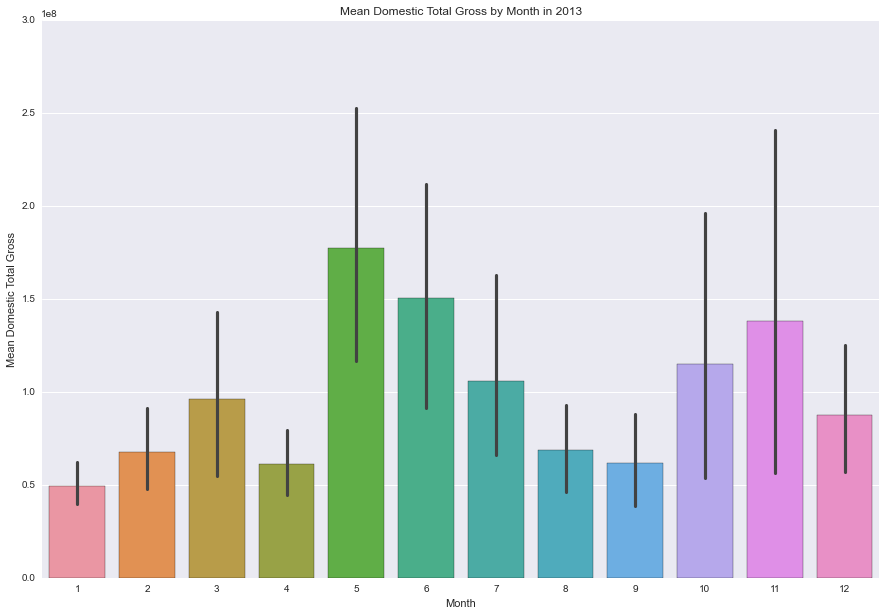

In [18]:
plt.figure(figsize=(15,10))
plt.title('Mean Domestic Total Gross by Month in 2013')
sns.barplot(x=df['month'], y=df['DomesticTotalGross'])
plt.xlabel('Month')
plt.ylabel('Mean Domestic Total Gross')